In [2]:
# Import libraries
import os
from tqdm import tqdm
import pandas as pd

# Redirecting to the directory
# os.chdir(os.path.join('.\ECON4999X'))
CLEANED_DATA_DIR = os.path.normpath(r'.\Cleaned_Data')
DA_DATA_DIR = os.path.normpath(r'.\da_working_files')
# print(os.listdir(CLEANED_DATA_DIR))

In [31]:
wb_data_url = r'https://gist.githubusercontent.com/sachinsdate/c40651e9e4bc13a696780462209f1992/raw/95f58d30404b2bd205f738b2466ca58c34f7b2ec/wb_data_panel_2ind_7units_1992_2014.csv'

In [32]:
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsap
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white
from matplotlib import pyplot as plt
import seaborn as sns

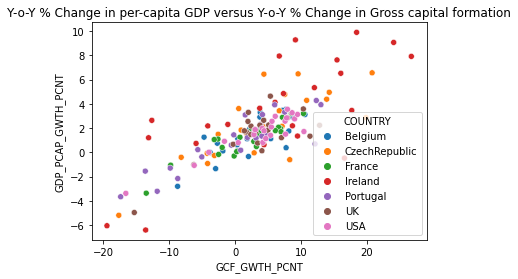

In [33]:
#Load the panel data set of World Bank published development indicators into a Pandas Dataframe
df_panel = pd.read_csv(wb_data_url, header=0)
#Use Seaborn to plot GDP growth over all time periods and across all countries versus gross
# capital formation growth:
sns.scatterplot(x=df_panel['GCF_GWTH_PCNT'], y=df_panel['GDP_PCAP_GWTH_PCNT'],
                hue=df_panel['COUNTRY']).set(title=
                'Y-o-Y % Change in per-capita GDP versus Y-o-Y % Change in Gross capital formation')
plt.show()

In [34]:
#Define the variables
print(df_panel.columns)
y_var_name = 'GDP_PCAP_GWTH_PCNT'
X_var_names = ['GCF_GWTH_PCNT']

Index(['COUNTRY', 'YEAR', 'GCF_GWTH_PCNT', 'GDP_PCAP_GWTH_PCNT'], dtype='object')


In [35]:
df_panel.head()

,COUNTRY,YEAR,GCF_GWTH_PCNT,GDP_PCAP_GWTH_PCNT
0,Belgium,1992,1.829137,1.119566
1,Belgium,1993,-2.956525,-1.348000
2,Belgium,1994,3.764435,2.909319
3,Belgium,1995,4.113741,2.170550
4,Belgium,1996,0.415439,1.123669


In [36]:
df_panel['COUNTRY'].unique()

array(['Belgium', 'CzechRepublic', 'France', 'Ireland', 'Portugal', 'UK',
       'USA'], dtype=object)

In [39]:
#Carve out the pooled Y
pooled_y=df_panel[y_var_name]
#Carve out the pooled X
pooled_X=df_panel[X_var_names]
#Add the placeholder for the regression intercept. When the model is fitted, the coefficient of
# this variable is the regression model's intercept β_0.
pooled_X = sm.add_constant(pooled_X)
#Build the OLS model
pooled_olsr_model = sm.OLS(endog=pooled_y, exog=pooled_X)
#Train the model and fetch the results
pooled_olsr_model_results = pooled_olsr_model.fit()
#Print the results summary
print('===============================================================================')
print('================================= Pooled OLS ==================================')
print(pooled_olsr_model_results.summary())

================================= Pooled OLS ==================================
                            OLS Regression Results                            
Dep. Variable:     GDP_PCAP_GWTH_PCNT   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     261.4
Date:                Thu, 04 May 2023   Prob (F-statistic):           2.15e-35
Time:                        16:27:50   Log-Likelihood:                -300.29
No. Observations:                 161   AIC:                             604.6
Df Residuals:                     159   BIC:                             610.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

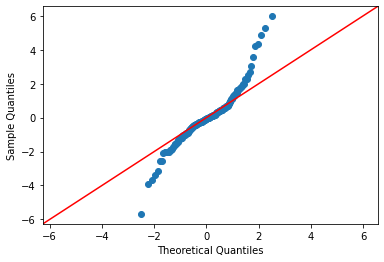

In [40]:
#Let's plot the Q-Q plot of the residual errors:
sm.qqplot(data=pooled_olsr_model_results.resid, line='45')
plt.show()


In [41]:
print('Mean value of residual errors='+str(pooled_olsr_model_results.resid.mean()))

Mean value of residual errors=3.309981688323448e-16


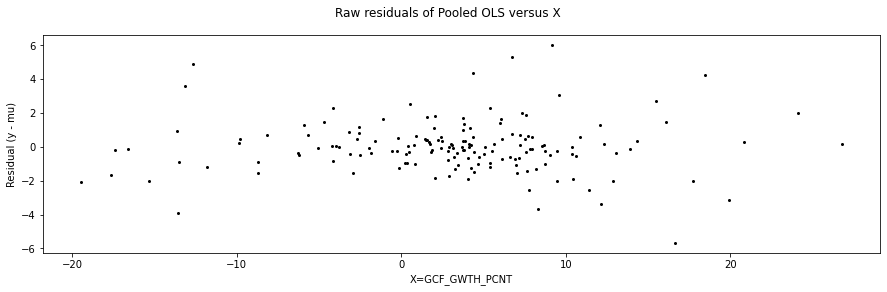

In [45]:
fig, ax = plt.subplots(figsize=(15, 4))
fig.suptitle('Raw residuals of Pooled OLS versus X')
plt.ylabel('Residual (y - mu)')
plt.xlabel('X='+str(X_var_names[0]))
ax.scatter(pooled_X[X_var_names[0]], pooled_olsr_model_results.resid, s=4, c='black', label='Residual Error')
plt.show()